# fun with stocks

[Docs](https://polygon.io/docs/getting-started)

- github: [polygon](https://github.com/polygon-io/client-python)
- docs: [`stocks_equities_aggregates`](https://polygon.io/docs/get_v2_aggs_ticker__stocksTicker__range__multiplier___timespan___from___to__anchor)

In [75]:
import datetime
from polygon import RESTClient
import yaml
from matplotlib import pyplot as plt

In [26]:
with open('api_key.yml') as f:
    apiKey = yaml.load(f, Loader=yaml.FullLoader)["key"]
    # print(apiKey)
key = apiKey

In [89]:
def simple():
    # RESTClient can be used as a context manager to facilitate closing the underlying http session
    # https://requests.readthedocs.io/en/master/user/advanced/#session-objects
    with RESTClient(key) as client:
        resp = client.stocks_equities_daily_open_close("TSLA", "2021-10-26")
        print(f"On: {resp.from_} Tesla opened at {resp.open} and closed at {resp.close}")

simple()

On: 2021-10-26 Tesla opened at 1024.69 and closed at 1018.43


In [67]:
def today():
    return datetime.datetime.now().strftime('%Y-%m-%d')

def ts_to_datetime(ts):
    return datetime.datetime.fromtimestamp(ts / 1000.0).strftime('%Y-%m-%d %H:%M')

# will return day's open/close/high/low when set to 1, "day"
def fetch(from_, to = None):
    with RESTClient(key) as client:
        if to is None:
            to = today()
        resp = client.stocks_equities_aggregates("TSLA", 1, "day", from_, to, unadjusted=False)
    return resp

def printStock(resp):
        print(f"Aggregates for {resp.ticker}")

        """
        "c": "close_price",
        "h": "high_price",
        "l": "low_price",
        "o": "open_price",
        "v": "volume",
        """
        for result in resp.results:
            dt = ts_to_datetime(result["t"])
            print(f"{dt}\n\tO: {result['o']}\n\tH: {result['h']}\n\tL: {result['l']}\n\tC: {result['c']} ")

In [90]:
tesla = fetch("2021-10-26")

In [91]:
printStock(tesla)

Aggregates for TSLA
2021-10-25 22:00
	O: 1024.69
	H: 1094.94
	L: 1001.44
	C: 1018.43 
2021-10-26 22:00
	O: 1039.66
	H: 1070.88
	L: 1030.78
	C: 1037.86 
2021-10-27 22:00
	O: 1068.305
	H: 1081
	L: 1054.2
	C: 1077.04 
2021-10-28 22:00
	O: 1081.86
	H: 1115.21
	L: 1073.205
	C: 1114 


In [92]:
for r in tesla.results:
    print(r)

{'v': 62403968.0, 'vw': 1043.8324, 'o': 1024.69, 'c': 1018.43, 'h': 1094.94, 'l': 1001.44, 't': 1635220800000, 'n': 1717719}
{'v': 38472949.0, 'vw': 1048.7663, 'o': 1039.66, 'c': 1037.86, 'h': 1070.88, 'l': 1030.78, 't': 1635307200000, 'n': 935160}
{'v': 27213173.0, 'vw': 1070.1433, 'o': 1068.305, 'c': 1077.04, 'h': 1081, 'l': 1054.2, 't': 1635393600000, 'n': 665902}
{'v': 29912217.0, 'vw': 1095.805, 'o': 1081.86, 'c': 1114, 'h': 1115.21, 'l': 1073.205, 't': 1635480000000, 'n': 763646}


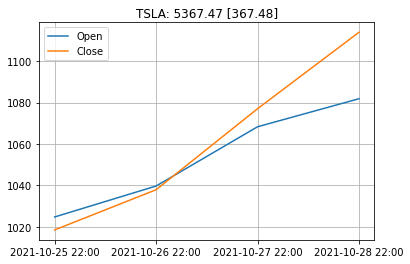

In [98]:
def plot(s):
    dt = [ts_to_datetime(r['t']) for r in s.results]
    o = [r['o'] for r in s.results]
    c = [r['c'] for r in s.results]
    
    curr = s.results[-1]['c']
    tot = 4.8182
    
    # plt.figure(figSize=(20,10))
    plt.plot(dt,o, label="Open")
    plt.plot(dt,c, label="Close")
    plt.grid(True)
    plt.legend()
    plt.title(f"TSLA: {tot*curr:.2f} [{tot*(curr-1037.73):.2f}]");
    
plot(tesla)